## 3. 파이토치 기초

In [3]:
import torch
import numpy as np

def print_val (x):
    print "Type:", type(x)
    print "Shape:", x.shape
    print "값:\n", x
    print " "

In [4]:
x = torch.rand(2,3,2) #uniform: 0~1 사이 모든 값들이 나올 확률이 같음
print_val(x)

x = torch.randn(2,3)
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3, 2])
값:
tensor([[[0.6716, 0.4629],
         [0.3242, 0.4107],
         [0.7291, 0.1032]],

        [[0.4458, 0.2384],
         [0.6284, 0.1549],
         [0.1012, 0.0491]]])
 
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값:
tensor([[ 0.4136,  1.0441, -0.4847],
        [ 0.1518, -0.4899,  0.9852]])
 


In [5]:
x = torch.randperm(4) # 0~ n-1 까지 값을 원소로 갖는 배열 -> 랜덤 배열
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([4])
값:
tensor([3, 2, 0, 1])
 


In [6]:
# [start, end)구간을 step 단위로 나눠서 배열로 생성
x = torch.arange(0, 3, step=0.5)
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([6])
값:
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])
 


In [7]:
print_val(torch.ones(3,4))
print_val(torch.zeros(3,4))

Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 4])
값:
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 
Type: <class 'torch.Tensor'>
Shape: torch.Size([3, 4])
값:
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
 


In [8]:
print_val(torch.Tensor(2,4))

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 4])
값:
tensor([[1.1024e+29, 4.5664e-41, 1.1024e+29, 4.5664e-41],
        [8.6248e-07, 3.0819e-41, 3.8824e+29, 4.5664e-41]])
 


In [11]:
print_val(torch.Tensor(2,3))

print_val(torch.Tensor([[2,3], [3,4]]))

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값:
tensor([[1.1024e+29, 4.5664e-41, 1.1024e+29],
        [4.5664e-41, 5.7020e+17, 4.5664e-41]])
 
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 2])
값:
tensor([[2., 3.],
        [3., 4.]])
 


In [12]:
# 텐서 타입 변환
x = torch.FloatTensor(2,3)
print_val(x)

x=x.type_as(torch.IntTensor())
print_val(x)

Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값:
tensor([[1.1024e+29, 4.5664e-41, 1.1024e+29],
        [4.5664e-41, 5.7019e+17, 4.5664e-41]])
 
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값:
tensor([[-2147483648,           0, -2147483648],
        [          0, -2147483648,           0]], dtype=torch.int32)
 


In [13]:
# 텐서 크기 반환
torch.FloatTensor(3,4,5).size()

torch.Size([3, 4, 5])

In [15]:
#numpy array -> torch tensor
np_x = np.ndarray((2,3), dtype=int)
print_val(np_x)

x = torch.from_numpy(np_x)
print_val(x)

Type: <type 'numpy.ndarray'>
Shape: (2, 3)
값:
[[    65984607168 139961659462688 139955804307474]
 [    91754412912 139961988803880              24]]
 
Type: <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
값:
tensor([[    65984607168, 139961659462688, 139955804307474],
        [    91754412912, 139961988803880,              24]])
 


## 4. MNIST 데이터로드

In [32]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
%matplotlib inline

### 0) MNIST는 어떻게 생겼나?

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이: 60000
5
torch.Size([1, 28, 28])


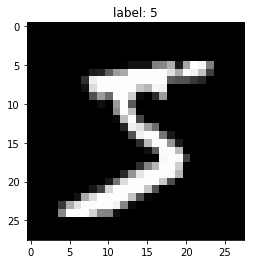

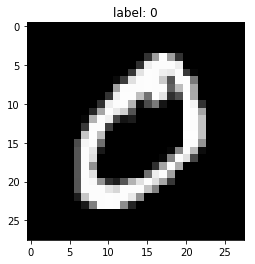

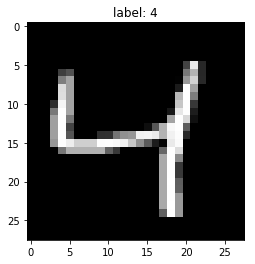

In [20]:
# 1. MNIST 로드
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(),
                      target_transform=None, download=True) 
#train용으로 쓰겠다.

# 2. 그려보기
# MNIST data 하나 형태 출력
Image, label = mnist_train.__getitem__(0)
print Image.size(), label

Image, label = mnist_train[1]
print Image.size(), label

print mnist_train.__len__()
print "mnist_train 길이:", len(mnist_train)

#그리기
print mnist_train[0][1] #label
print mnist_train[0][0].size() #image

for i in range(3):
    img = mnist_train[i][0].numpy() #image 타입을 numpy로 변환 (1,28,28)
    #print "label:",mnist_train[i][1]
    plt.title("label: %d" %mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

### 1) MNIST train, test dataset 가져오기

In [23]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(),
                      target_transform=None, download=True)
#train 용으로 쓰겠다.

mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                      target_transform=None, download=True)
#test용으로 쓰겠다.

### 2) 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
Image data 형태: torch.Size([1, 28, 28])
label: 5


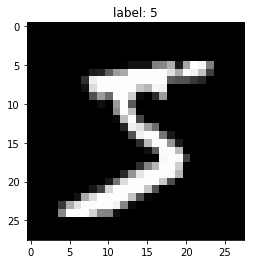

In [26]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

#데이터 하나 형태
Image, label = mnist_train.__getitem__(0) #0번째 데이터
print "Image data 형태:", Image.size()
print "label:", label

#그리기
img = Image.numpy() #image타입을 numpy로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

### 3) 데이터 로드함수
#### 학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [27]:
batch_size=16

In [30]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                               #mnist_train을 트레인 시키자.
                                               shuffle=True, num_workers=2,
                                               drop_last=True) # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader(list(mnist_test), batch_size=batch_size,
                                               shuffle=True, num_workers=2,
                                               drop_last=True)

### 4) 데이터 로드함수 이해하기

[0]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


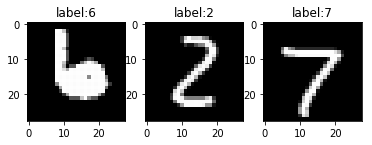

[1]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


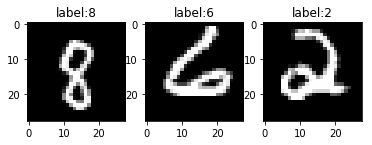

[2]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


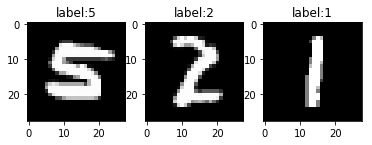

[3]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


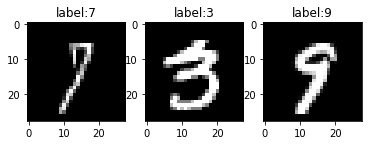

[4]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


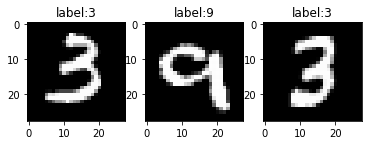

[5]
한 번에 로드되는 데이터 크기: 16
torch.Size([16, 28, 28])
torch.Size([16])


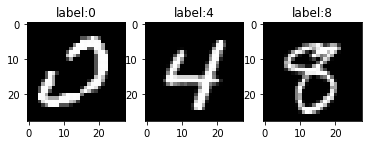

In [33]:
n = 3 #샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): #batch_size 만큼
    if i>5:
        break
    
    print "[%d]" %i
    print "한 번에 로드되는 데이터 크기:", len(imgs)
    
    #GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 자동으로(?) CPU로 로드됨
    x = Variable(imgs)#.cuda()  #(batch_size, 1, 28, 28)
    x = x.reshape((x.shape[0], x.shape[2], x.shape[3])) #(batch_size, 1, 28, 28) -> (batch_size, 28, 28)
    y_ = Variable(labels) #.cuda()  #(batch_size)
    
    print x.shape
    print y_.shape
    
    #그리기
    for j in range(n):
        img = imgs[j].numpy() #image 타입을 numpy로 변환 (1,28,28)
        img = img.reshape((img.shape[1], img.shape[2])) #(1,28,28) -> (28,28)
        #print img.shape
        
        plt.subplot(1, n, j+1) #(1,3) 형태 플랏의 j 번째 자리에 그리겠다.
        plt.imshow(img, cmap="gray")
        plt.title("label:%d" %labels[j])
    plt.show()